In [1]:
import pandas as pd
import numpy as np
import prepare
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pydataset import data
import wrangle
# modeling methods
from sklearn.preprocessing import MinMaxScaler
import sklearn

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

Exercises

Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

1. Select a dataset with a continuous target variable.

2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

Notes

1. 
 Regularization = "Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting." Towards Data Science

2. 
 TweedieRegressor: Requires sklearn v0.23 or greater installed. To update, run in terminal: conda install scikit-learn=0.23

1. Select a dataset with a continuous target variable.

In [2]:
df = data('tips')

Dataframe, Feature and target variables, Unscaled, Dummy vars with original categorical vars	New features, additional cleaning needed, etc.


In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [5]:
df = df.rename(columns={"size": "group"})

In [6]:
x_train_and_validate, x_test = train_test_split(df, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)


In [7]:
x_train_and_validate.shape, x_train.shape, x_validate.shape, x_test.shape

((183, 7), (137, 7), (46, 7), (61, 7))

Series, Target variable only, Unscaled	Feature selection, evaluate model predictions

In [8]:
y_train=x_train['tip']

Dataframe, Features variables only, Scaled, Dummy vars without original categorical vars	Make predictions using top models

In [9]:
y_test = x_test['tip']
y_validate = x_validate['tip']

Dataframe, Feature variables only, Unscaled, Dummy vars with original categorical vars	Exploration & analysis

In [10]:
x_train_exp = x_train

Dataframe, Feature variables only, Scaled, Dummy vars without original categorical vars	Feature selection, fit models, make predictions

In [11]:
x_train

,total_bill,tip,sex,smoker,day,time,group
228,20.45,3.00,Male,No,Sat,Dinner,4
118,10.65,1.50,Female,No,Thur,Lunch,2
94,16.32,4.30,Female,Yes,Fri,Dinner,2
40,31.27,5.00,Male,No,Sat,Dinner,3
71,12.02,1.97,Male,No,Sat,Dinner,2
109,18.24,3.76,Male,No,Sat,Dinner,2
99,21.01,3.00,Male,Yes,Fri,Dinner,2
101,11.35,2.50,Female,Yes,Fri,Dinner,2
195,16.58,4.00,Male,Yes,Thur,Lunch,2
64,18.29,3.76,Male,Yes,Sat,Dinner,4


In [12]:
x_train['sex']=LabelEncoder().fit_transform(x_train['sex'])
x_train['smoker']=LabelEncoder().fit_transform(x_train['smoker'])
x_train['day']=LabelEncoder().fit_transform(x_train['day'])
x_train['time']=LabelEncoder().fit_transform(x_train['time'])




In [13]:
x_train

,total_bill,tip,sex,smoker,day,time,group
228,20.45,3.00,1,0,1,0,4
118,10.65,1.50,0,0,3,1,2
94,16.32,4.30,0,1,0,0,2
40,31.27,5.00,1,0,1,0,3
71,12.02,1.97,1,0,1,0,2
109,18.24,3.76,1,0,1,0,2
99,21.01,3.00,1,1,0,0,2
101,11.35,2.50,0,1,0,0,2
195,16.58,4.00,1,1,3,1,2
64,18.29,3.76,1,1,1,0,4


In [14]:
x_train = x_train.drop(columns='tip')
x_validate = x_validate.drop(columns='tip')
x_test = x_test.drop(columns='tip')

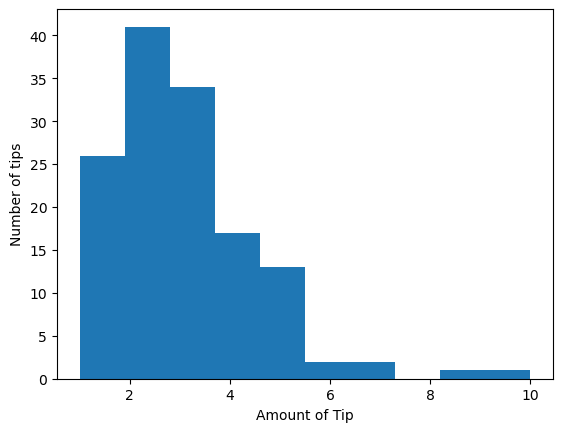

In [15]:
plt.hist(y_train)
plt.xlabel('Amount of Tip')
plt.ylabel('Number of tips')
plt.show()

# Modeling

# Baseline

About the initial baseline:

Before we begin making models, we need to know how well we can estimate (predict) the final grade (G3) without using any features. This is often done by predicting every observation's target value to be the mean or the median. E.g. we could predict every student's final grade to be the mean final grade of all the students in our training sample. We will try both the mean and the median, see which performs best, and set that evaluation metric value as our baseline performance to beat.

1. Predict all final grades to be 10.52, which is equal to the mean of G3 for the training sample. Store in y_train['G3_pred_mean'].

2. Predict all final grades to be 11, which is equal to the median of G3 for the training sample. Store in y_train['G3_pred_median'].

3. Compute the RMSE comparing actual final grade (G3) to G3_pred_mean.

4. Compute the RMSE comparing actual final grade (G3) to G3_pred_median.

In [16]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [17]:
# 1. Predict tip_pred_mean
tip_pred_mean = y_train['tip'].mean()
y_train['tip_pred_mean'] = tip_pred_mean
y_validate['tip_pred_mean'] = tip_pred_mean


In [18]:
# 2. compute G3_pred_median
tip_pred_median = y_train['tip'].median()
y_train['tip_pred_median'] = tip_pred_median
y_validate['tip_pred_median'] = tip_pred_median

In [19]:
# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_mean)**(1/2)

In [20]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  1.46 
Validate/Out-of-Sample:  1.36


In [21]:
# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_median)**(1/2)

In [22]:
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  1.46 
Validate/Out-of-Sample:  1.35


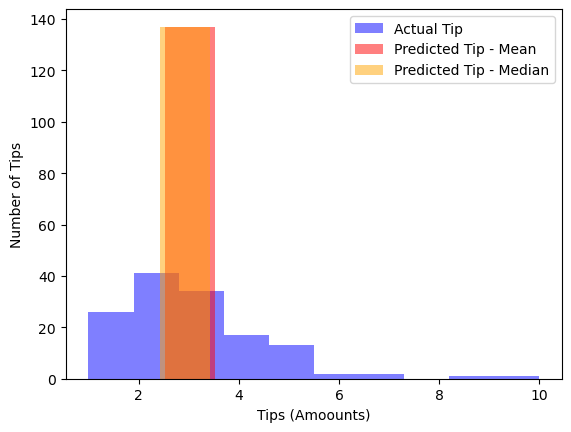

In [23]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tip, color='blue', alpha=.5, label="Actual Tip")
plt.hist(y_train.tip_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Tip - Mean")
plt.hist(y_train.tip_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Tip - Median")
plt.xlabel("Tips (Amoounts)")
plt.ylabel("Number of Tips")
plt.legend()
plt.show()

# LinearRegression (OLS)

Fit the model using X_train_scaled and the labels from y_train.
Predict final grade for students in training sample using our model (lm).
Evaluate using RMSE
Repeat predictions and evaluation for validation.
Compare RMSE train vs. validation. Overfitting?

In [24]:
x_validate['sex']=LabelEncoder().fit_transform(x_validate['sex'])
x_validate['smoker']=LabelEncoder().fit_transform(x_validate['smoker'])
x_validate['day']=LabelEncoder().fit_transform(x_validate['day'])
x_validate['time']=LabelEncoder().fit_transform(x_validate['time'])

x_test['sex']=LabelEncoder().fit_transform(x_test['sex'])
x_test['smoker']=LabelEncoder().fit_transform(x_test['smoker'])
x_test['day']=LabelEncoder().fit_transform(x_test['day'])
x_test['time']=LabelEncoder().fit_transform(x_test['time'])

In [25]:
def minmax_scaler():
    ######## Min Max Scaler (range calculations)
    scaler = sklearn.preprocessing.MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(x_train)
    ### Apply to train, validate, and test
    x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
    x_validate_scaled = pd.DataFrame(scaler.transform(x_validate), columns = x_validate.columns)
    x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
    return x_train_scaled, x_validate_scaled, x_test_scaled

In [26]:
x_train_scaled, x_validate_scaled, x_test_scaled = minmax_scaler()

In [27]:
# create the model object
lm = LinearRegression(normalize=True)

In [28]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(x_train, y_train.tip)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [29]:
# predict train
y_train['tip_pred_lm'] = lm.predict(x_train)

In [30]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm)**(1/2)

In [31]:
# predict validate
y_validate['tip_pred_lm'] = lm.predict(x_validate)

In [36]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm)**(1/2)

In [37]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.0387890217909523 
Validation/Out-of-Sample:  1.1231065031082381


# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(x_train, y_train.tip)

# predict train
y_train['tip_pred_lm'] = lm.predict(x_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm)**(1/2)

# predict validate
y_validate['tip_pred_lm'] = lm.predict(x_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

# LassoLars

Fit the model using X_train_scaled and the labels from y_train.
Predict final grade for students in training sample using our model (lars).
Evaluate using RMSE
Repeat predictions and evaluation for validation.
Compare RMSE train vs. validation. Overfitting?

In [38]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(x_train, y_train.tip)

# predict train
y_train['tip_pred_lars'] = lars.predict(x_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lars)**(1/2)

# predict validate
y_validate['tip_pred_lars'] = lars.predict(x_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  1.456782271955654 
Validation/Out-of-Sample:  1.359488690540294


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


# TweedieRegressor (GLM)

Fit the model using X_train_scaled and the labels from y_train.
Predict final grade for students in training sample using our model (glm).
Evaluate using RMSE
Repeat predictions and evaluation for validation.
Compare RMSE train vs. validation. Overfitting?

In [39]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(x_train, y_train.tip)

# predict train
y_train['tip_pred_glm'] = glm.predict(x_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_glm)**(1/2)

# predict validate
y_validate['tip_pred_glm'] = glm.predict(x_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  1.032007057154305 
Validation/Out-of-Sample:  1.2214066283620222


# Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

Create the new features, based on value indicated for degree for train, validate & test.
Fit the Linear Regression model
Predict using the transformed (squared or cubed, e.g.) features
Evaluate using RMSE
Repeat predictions and evaluation for validation.
Compare RMSE train vs. validation. Overfitting?

## PolynomialFeatures

In [40]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_train_degree2 = pf.fit_transform(x_train)

# transform X_validate_scaled & X_test_scaled
x_validate_degree2 = pf.transform(x_validate)
x_test_degree2 = pf.transform(x_test)


## LinearRegression

In [41]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(x_train_degree2, y_train.tip)

# predict train
y_train['tip_pred_lm2'] = lm2.predict(x_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm2)**(1/2)

# predict validate
y_validate['tip_pred_lm2'] = lm2.predict(x_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.9684811376376176 
Validation/Out-of-Sample:  1.1890599165115052


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


# Evaluate

## Plotting Actual vs. Predicted Values

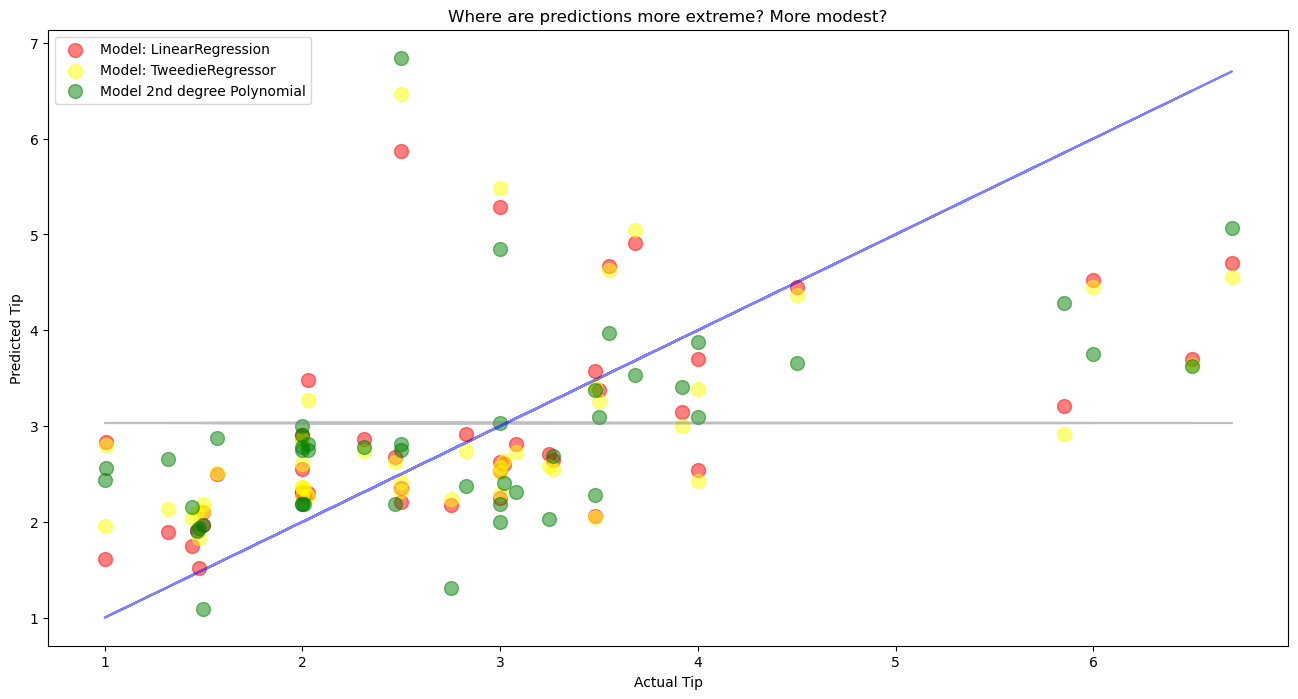

In [61]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tip, y_validate.tip_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tip, y_validate.tip, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tip, y_validate.tip_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tip, y_validate.tip_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Where are predictions more extreme? More modest?")
#plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


## Residual Plots: Plotting the Errors in Predictions

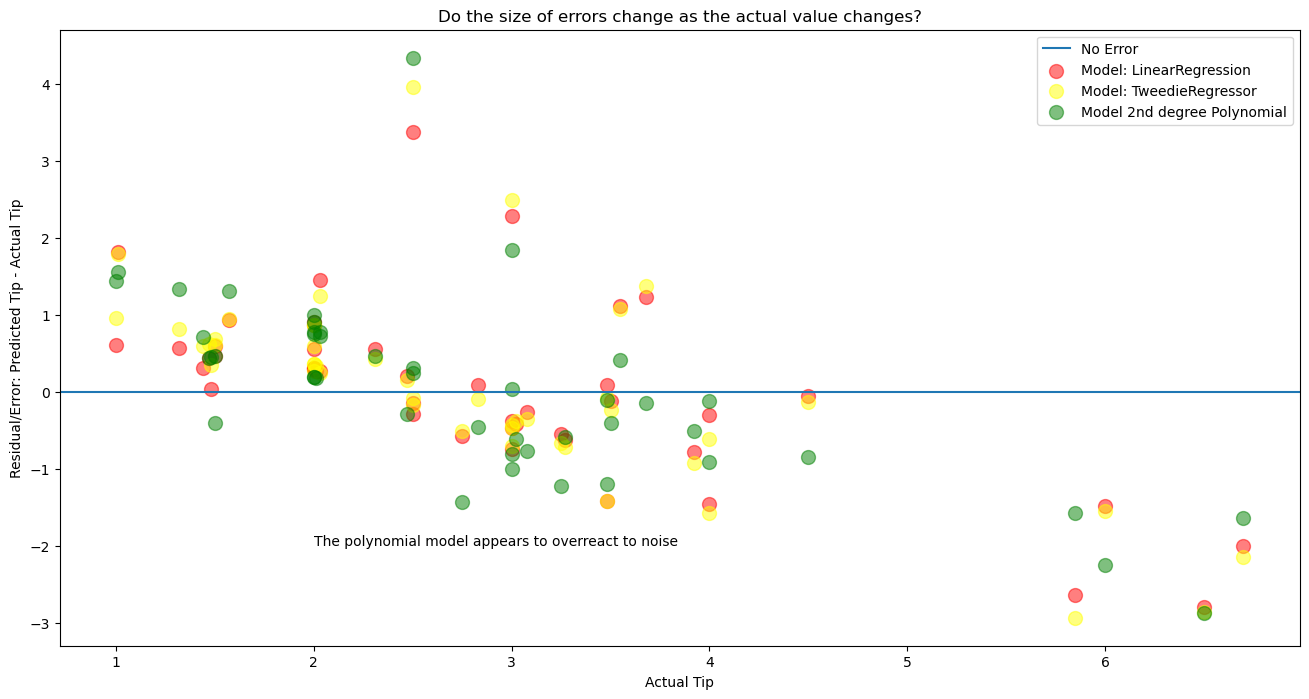

In [64]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm-y_validate.tip, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tip, y_validate.tip_pred_glm-y_validate.tip, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tip, y_validate.tip_pred_lm2-y_validate.tip, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tip")
plt.ylabel("Residual/Error: Predicted Tip - Actual Tip")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -2))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


# Histograms

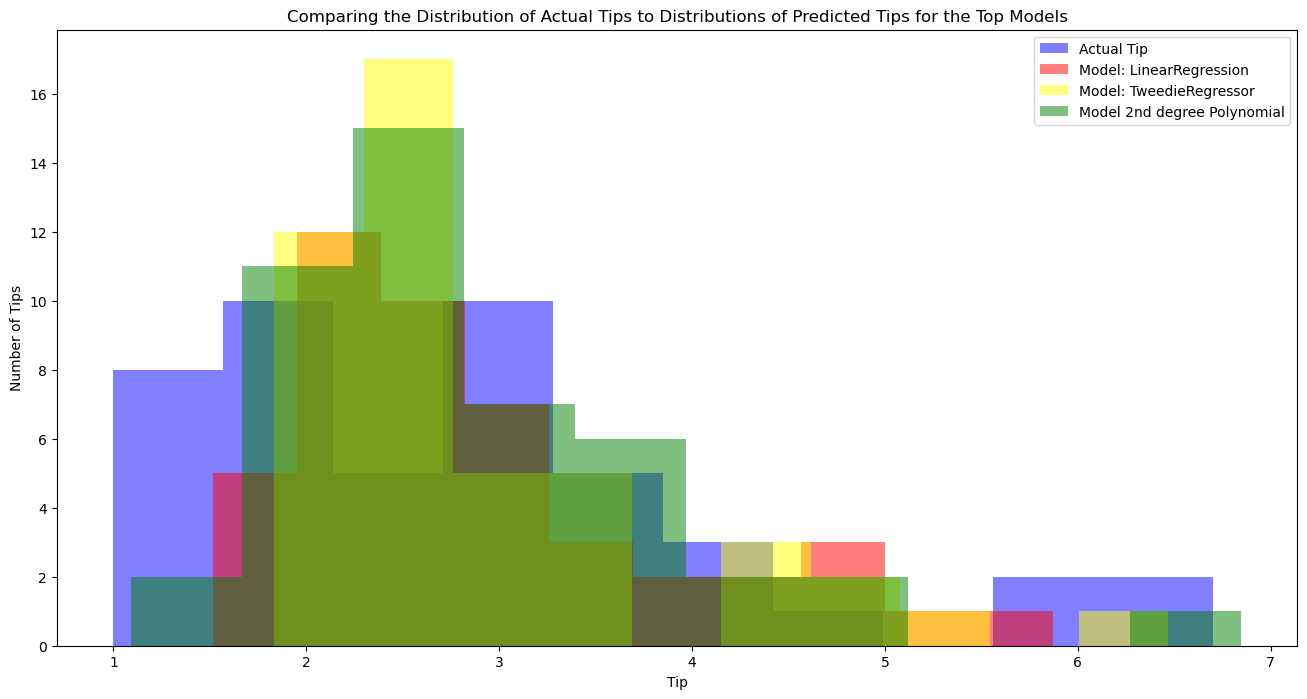

In [65]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tip, color='blue', alpha=.5, label="Actual Tip ")
plt.hist(y_validate.tip_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tip_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tip_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tip")
plt.ylabel("Number of Tips")
plt.title("Comparing the Distribution of Actual Tips to Distributions of Predicted Tips for the Top Models")
plt.legend()
plt.show()


# Model Selection & Out-of-Sample Evaluation

Model selected: lm (using LinearRegression)

In [66]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['tip_pred_lm'] = lm.predict(x_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tip, y_test.tip_pred_lm)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)


RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  0.9078971478844932


In [32]:
cat_cols = df[['sex','smoker','day','time']]
num_cols = df[['total_bill','tip','group']]

In [33]:
cat_cols.dtypes

sex       object
smoker    object
day       object
time      object
dtype: object

In [34]:
num_cols.dtypes

total_bill    float64
tip           float64
group           int64
dtype: object

In [35]:
df.isna().value_counts()

total_bill  tip    sex    smoker  day    time   group
False       False  False  False   False  False  False    244
dtype: int64